## Uniform Sampling

In [2]:
import random

def sample_uniform(min_val, max_val, sample_size):
    samples = []
    for _ in range(sample_size):
        u = random.random() 
        x = min_val + (max_val - min_val) * u
        samples.append(x)
    return samples


samples = sample_uniform(10, 20, 5)
print(samples)


[14.948502041536276, 14.123730389045553, 10.000651796647041, 14.432090000094561, 13.217849752470734]


## Gaussian Sampling using Box Muller Transform

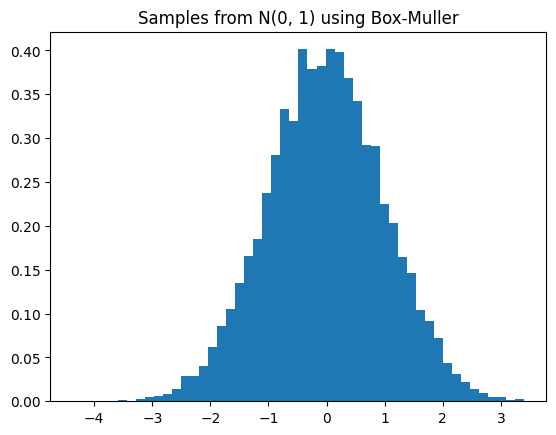

In [12]:
import random
import math

def gaussian_sample(mu, sigma, sample_size):
    samples = []
    for _ in range((sample_size+1) // 2):
        u1 = random.random()
        u2 = random.random()
        u1 = max(u1, 1e-10)

        z0 = math.sqrt(-2.0 * math.log(u1)) * math.cos(2.0 * math.pi * u2)
        z1 = math.sqrt(-2.0 * math.log(u1)) * math.sin(2.0 * math.pi * u2)

        samples.append(mu + sigma * z0)
        samples.append(mu + sigma * z1)

    return samples[:sample_size]

samples = gaussian_sample(0, 1, 10000)
import matplotlib.pyplot as plt
plt.hist(samples, bins=50, density=True)
plt.title("Samples from N(0, 1) using Box-Muller")
plt.show()


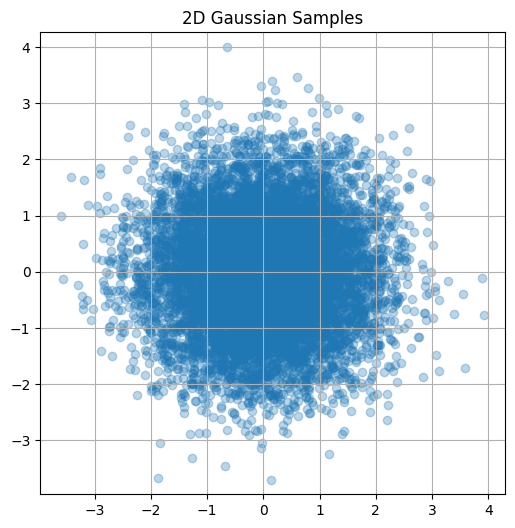

In [15]:
def sample_2d_gaussian(mu, sigma, sample_size):
    samples = []
    for _ in range(sample_size):
        x = gaussian_sample(mu[0], sigma[0], 1)[0]
        y = gaussian_sample(mu[1], sigma[1], 1)[0]
        samples.append((x, y))
    return samples


samples = sample_2d_gaussian([0, 0], [1, 1], 10000)

import matplotlib.pyplot as plt
x_vals = [p[0] for p in samples]
y_vals = [p[1] for p in samples]

plt.figure(figsize=(6, 6))
plt.scatter(x_vals, y_vals, alpha=0.3)
plt.title("2D Gaussian Samples")
plt.axis('equal')
plt.grid(True)
plt.show()


## Non Repeated and Normalized Sampling

In [24]:
def stevens_sampling(items, weights, sample_size):
    assert len(items) == len(weights)
    keys = []
    for item, w in zip(items, weights):
        u = random.random()
        k = u ** (1.0 / w)
        keys.append((k, item))
        
    keys.sort(reverse=True)
    selected_items = [item for _, item in keys[:sample_size]]
    return selected_items

items = list(range(300))
weights = [random.uniform(1, 10) for _ in items]  
sample_size = 20                 

result = stevens_sampling(items, weights, sample_size)
print("Selected items:", result)


Selected items: [265, 184, 15, 124, 55, 133, 109, 7, 151, 147, 258, 100, 101, 21, 241, 36, 66, 77, 166, 214]
